In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten,MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
pd.set_option('display.max_columns',100)
Data = pd.read_excel("Otw4_mgr.xlsx")

In [17]:
Labeleddata = Data.dropna()

In [18]:
features = list(Data.columns.values)
Labeleddata_withr8index = Labeleddata.reset_index(drop=True)#NAN DROP

from sklearn import preprocessing

x = Labeleddata_withr8index.iloc[:,1:20].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = features[1:20]

non_standarized_data = Labeleddata_withr8index
test_row_standarized = df.iloc[5:7]

non_standarized_data = non_standarized_data.drop([5,6])
TOC = non_standarized_data["TOC[%]"]
TOC = TOC.reset_index(drop=True) #31 elements of nonstandarized TOC

test_row = Labeleddata_withr8index.iloc[5:7]#test rows 5,6+
R8data= df.drop([5,6])# dropping 5 and 6 row in labeled data and creating R8data (31 elements)
R8data = R8data.reset_index(drop=True)# reseting index for R8data



#TOC = non_standarized_data["TOC[%]"]#toc 31 elements

TOC_row5=test_row["TOC[%]"] # TOC 2 elements non standarized
#R8data,Toc, test_row_standarized, TOC_row5

In [19]:
x, y = R8data, TOC
print(x.shape)

(32, 19)


In [20]:
x = x.values.reshape(x.shape[0],x.shape[1],1)
print(x.shape)

(32, 19, 1)


In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.16)


In [22]:
model = Sequential()
model.add(Conv1D(16, 2, activation="relu", input_shape=(19,1)))
model.add(MaxPooling1D())
model.add(Conv1D(32, 2, activation="relu", input_shape=(19,1)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 18, 16)            48        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 32)             1056      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [23]:
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "SIEC-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [24]:
model.fit(xtrain, ytrain,epochs=150,callbacks =[tensorboard] )


Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 16.8702 - accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 1s 1s/step - loss: 16.3388 - accuracy: 0.0000e+00
Epoch 3/150
1/1 [==============================] - 0s 24ms/step - loss: 15.8104 - accuracy: 0.0000e+00
Epoch 4/150
1/1 [==============================] - 0s 0s/step - loss: 15.2873 - accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 8ms/step - loss: 14.7927 - accuracy: 0.0000e+00
Epoch 6/150
1/1 [==============================] - 0s 8ms/step - loss: 14.3154 - accuracy: 0.0000e+00
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 13.8416 - accuracy: 0.0000e+00
Epoch 8/150
1/1 [==============================] - 0s 8ms/step - loss: 13.3790 - accuracy: 0.0000e+00
Epoch 9/150
1/1 [==============================] - 0s 16ms/step - loss: 12.9253 - accuracy: 0.0000e+00
Epoch 10/150
1/1 [==============================] - 0s 8ms/step - loss: 12.4821 - a

1/1 [==============================] - 0s 0s/step - loss: 1.0485 - accuracy: 0.0000e+00
Epoch 82/150
1/1 [==============================] - 0s 8ms/step - loss: 1.0306 - accuracy: 0.0000e+00
Epoch 83/150
1/1 [==============================] - 0s 0s/step - loss: 1.0163 - accuracy: 0.0000e+00
Epoch 84/150
1/1 [==============================] - 0s 8ms/step - loss: 1.0049 - accuracy: 0.0000e+00
Epoch 85/150
1/1 [==============================] - 0s 0s/step - loss: 0.9955 - accuracy: 0.0000e+00
Epoch 86/150
1/1 [==============================] - 0s 0s/step - loss: 0.9877 - accuracy: 0.0000e+00
Epoch 87/150
1/1 [==============================] - 0s 8ms/step - loss: 0.9813 - accuracy: 0.0000e+00
Epoch 88/150
1/1 [==============================] - 0s 8ms/step - loss: 0.9766 - accuracy: 0.0000e+00
Epoch 89/150
1/1 [==============================] - 0s 8ms/step - loss: 0.9724 - accuracy: 0.0000e+00
Epoch 90/150
1/1 [==============================] - 0s 0s/step - loss: 0.9685 - accuracy: 0.0000e+0

In [29]:
loss, accuracy = model.evaluate(xtest,ytest)
accuracy

1/1 [==============================] - 0s 24ms/step - loss: 1.4756 - accuracy: 0.0000e+00


0.0

In [26]:
ypred = model.predict(xtest)
ypred


array([[0.11661702],
       [0.63367605],
       [7.195854  ],
       [0.04007149],
       [0.22301912],
       [0.20610213]], dtype=float32)

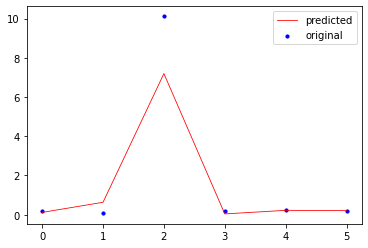

In [27]:
x_ax = range(len(ypred)) 
plt.scatter(x_ax, ytest, s=10, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [28]:
test_rownet = np.asarray(test_row_standarized) #testrow to model data without H, Hlab and TOC
test_rownet = test_rownet.reshape(2,19,1)
testpred = model.predict(test_rownet)
print(testpred)

[[0.11235458]
 [0.03002214]]
